# **Codveda Technologies Internship For ML**
# Task 2: Build a Simple Linear Regression Model
**Intern**-*MD*.*Rakibul* *Hossain*

**Dataset**-*houseprice*.*csv*

**Objectives**:
* Load a dataset and preprocess it.
* Train a linear regression model using scikit-learn.
* Interpret the model coefficients.
* Evaluate the model using R-squared and mean squarederror (MSE).
* Tools: Python, pandas, scikit-learn.

**Description**: Build a linear regression model to predict
a continuous variable (e.g., house prices).


---





# 1.Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Import the relevant libraries

In [2]:
#python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 3.Load Dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/4) house Prediction Data Set.csv', delim_whitespace=True)

<ipython-input-3-7e129ba428cf>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('/content/drive/MyDrive/Dataset/4) house Prediction Data Set.csv', delim_whitespace=True)


# 4.Head of dataset

In [4]:
#Head of dataset
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


* here we can see that dataset has no columns name

# 5.Dataset Information

In [5]:
df.info() #Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5   6.5750   505 non-null    float64
 6   65.20    505 non-null    float64
 7   4.0900   505 non-null    float64
 8   1        505 non-null    int64  
 9   296.0    505 non-null    float64
 10  15.30    505 non-null    float64
 11  396.90   505 non-null    float64
 12  4.98     505 non-null    float64
 13  24.00    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


# 6.Check Null Values of Dataset

In [6]:
df.isnull().sum() #check null values

,0
0.00632,0
18.00,0
2.310,0
0,0
0.5380,0
6.5750,0
65.20,0
4.0900,0
1,0
296.0,0


* we can see there is no null values

# 7.Describe the Dataset

In [7]:
df.describe() #Data describe

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 8.Shape of dataset

In [8]:
df.shape #shape of dataset row and columns

(505, 14)

# 9.Add Columns Name

In [9]:
# Define the correct column names for the Boston housing dataset
columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
           'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns=columns

* we add columns name

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


# 10.Drop column 'CHAS'

In [11]:
#drop columns 'CHAS'
df.drop('CHAS', axis=1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


* we drop column 'CHAS' cause it's not important

# 11. Feature Correlation

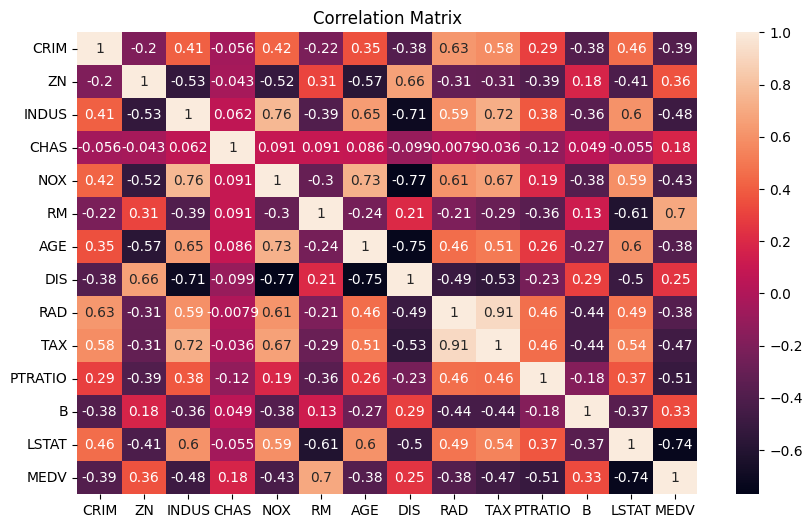

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

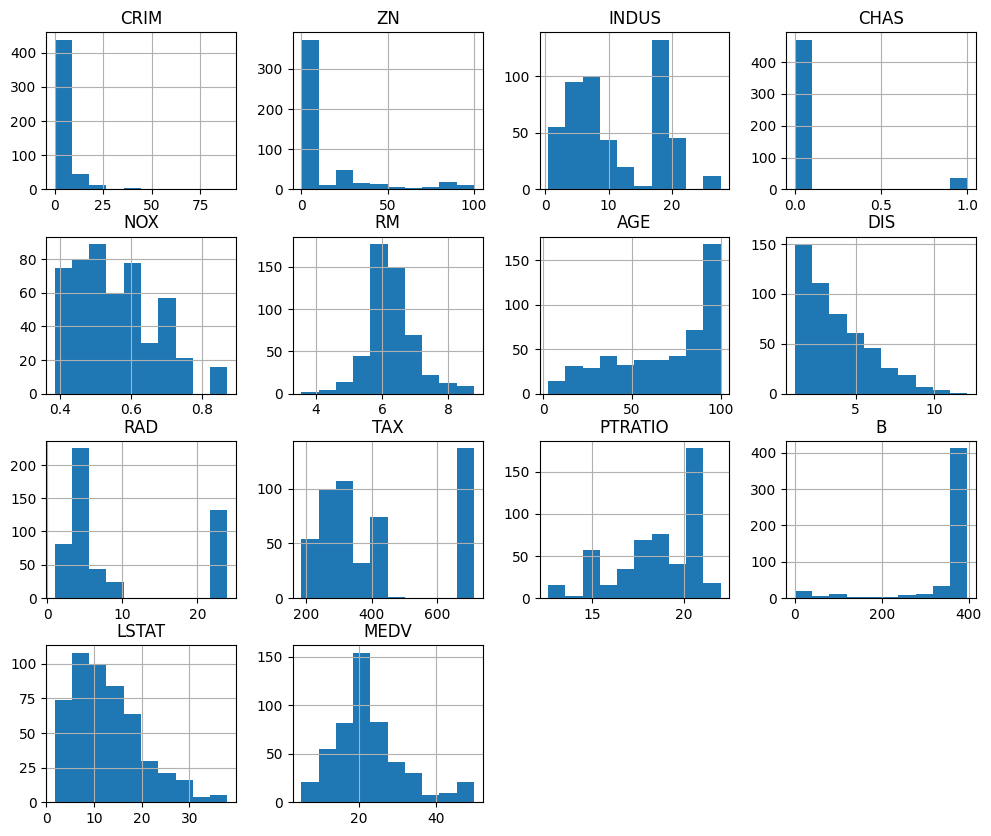

In [13]:
#data visualization
# Histograms of numeric features
df.hist(figsize=(12, 10))
plt.show()

# 12.Feature Selection

In [14]:
#selecting feature
Features =['RM','INDUS','TAX','PTRATIO','LSTAT','B']
x=df[Features]
y=df['MEDV']

# 13.Split into Training and Testing Sets

In [15]:
#Split Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=32)


# 14.Train Linear Regression Model

In [16]:
#selecting linear regression model
lr = LinearRegression()
#training the model
lr.fit(x_train, y_train)


LinearRegression()

In [17]:
print(lr.score(x_train, y_train)*100)
print(lr.score(x_test, y_test)*100)

68.9860333700237
67.24276207906861


# 15.Interpret Model Coefficients

In [18]:
print(f"Intercept: {lr.intercept_}") #Intercept
print(f"Coefficient for MedInc: {lr.coef_[0]}") #Coefficient


Intercept: 10.62243301311278
Coefficient for MedInc: 5.0475310451769975


In [19]:
#model coefficients
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': lr.coef_})
print(coefficients)


   Feature  Coefficient
0       RM     5.047531
1    INDUS     0.009340
2      TAX    -0.004065
3  PTRATIO    -0.828483
4    LSTAT    -0.443304
5        B     0.007352


# 16. Evaluate Model

In [20]:
#model prediction
y_pred = lr.predict(x_test)

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 29.602871277035888
R-squared: 0.6724276207906861


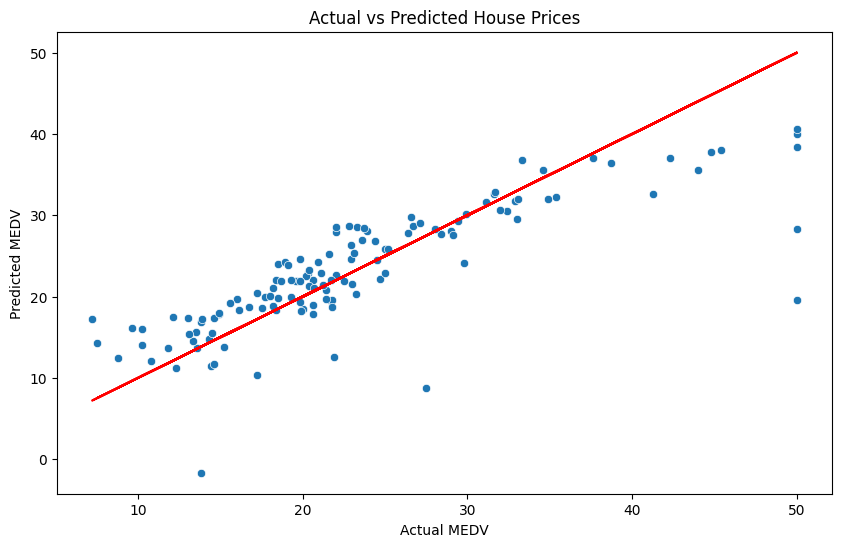

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.show()


**Conclusion**

In this task, we:

Explored the Boston Housing dataset
Selected features based on correlation with MEDV
Built a linear regression model
Achieved an R-squared score of {r2_value} and MSE of {mse_value}
The model shows [briefly mention insights: e.g., higher RM → higher price, higher LSTAT → lower price]